<a href="https://colab.research.google.com/github/whitestones011/deep_learning/blob/master/nn_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single layer neural network

$$ y = f(w_1 x_1 + w_2 x_2 + b) $$

$$ y = f\left(\sum_i w_i x_i + b\right) $$

The Perceptron is a linear binary classification algorithm.

In [4]:
# !pip install torch torchvision

In [5]:
import torch

In [8]:
print(torch.__version__)

2.0.1+cu118


In [41]:
def sigmoid_activation(x):
  return 1 / (1 + torch.exp(-x))

Generate data

In [6]:
torch.manual_seed(42)

In [7]:
feat = torch.rand(1,5)

In [9]:
weights = torch.rand_like(feat)

In [13]:
bais = torch.randn(1,1)

Perceptron

In [42]:
sigmoid_activation(torch.sum(feat*weights) + bais)

tensor([[0.9157]])

Reshaping weights matrix

In [43]:
sigmoid_activation(torch.mm(feat, weights.view(5,1)) + bais)

tensor([[0.9157]])

# Multiple layer neural network

In [45]:
# Define shape of NN
n_input = feat.shape[1]
n_hidden = 2
n_output = 1

In [47]:
# Weight from input to hidden layer - random numbers from a normal distribution
w1 = torch.randn(n_input, n_hidden)
w1

tensor([[-0.4220, -1.3323],
        [-0.3639,  0.1513],
        [-0.3514, -0.7906],
        [-0.0915,  0.2352],
        [ 2.2440,  0.5817]])

In [48]:
# Weight from hidden to output layer - random numbers from a normal distribution
w2 = torch.randn(n_hidden, n_output)
w2

tensor([[0.4528],
        [0.6410]])

In [49]:
# Bias for hidden and output layers
b1 = torch.randn(1,n_hidden)
b2 = torch.randn(1,n_output)

In [55]:
# Calculate hidden layer
h = sigmoid_activation(torch.mm(feat,w1) + b1)
h

tensor([[0.6150, 0.4182]])

In [105]:
# Calculate output layer
sigmoid_activation(torch.mm(h,w2) + b2)

tensor([[0.6504]])

# MNIST

MNIST dataset consists of 28x28 pixel images of greyscale handwritten digits.

In [103]:
import matplotlib.pyplot as plt

In [57]:
from torchvision import datasets, transforms

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('/content/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [100]:
# Get a batch of training data
images, labels = next(iter(trainloader))

In [101]:
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


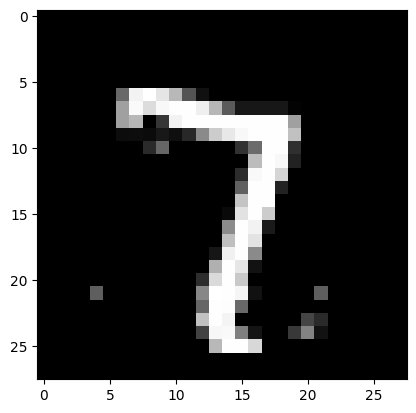

In [104]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');